# **IE 643: Feed Forward Neural Network Demo**

In this demo, we will see how to build a Multi-layered perceptron (Feed Forward Neural Network or FFNN) from scratch.

# Importing the basic libaries -

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

# **Loading the Data-**

We will be using MNIST Dataset for the classification problem. MNIST dataset contains grayscale images of handwritten digits of the size 28*28. We will be building a neural network to classify these images.

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. 

Source- http://yann.lecun.com/exdb/mnist/

In [3]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


#### Displaying an image from the dataset

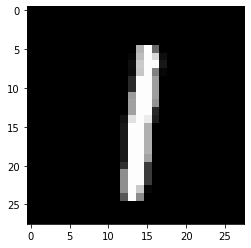



Label in dataset: 1


In [4]:
plt.imshow(X_train[40],cmap='gray')
plt.show()
print(f"\n\nLabel in dataset: {Y_train[40]}")

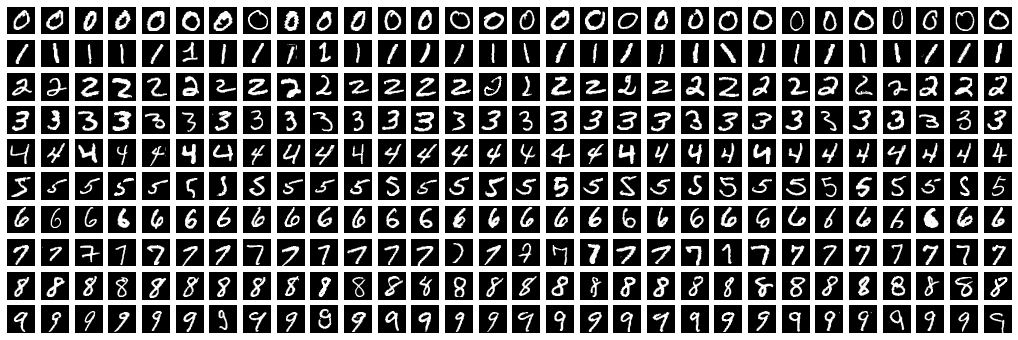

In [5]:
# Sample images for all digits

digits = np.unique(Y_train)
M = 30
dim = 28
fig, axs = plt.subplots(len(digits), M, figsize=(18,6))

for i,d in enumerate(digits):
    for j in range(M):
        axs[i,j].imshow(X_train[Y_train==d][j].reshape((dim,dim)), cmap='gray')
        axs[i,j].axis('off')

In [27]:
#Displaying the contents of 41th image (the choice of index 41 is random here)
X_train[40]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 178, 255, 105,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

As you can see here, each image is a (28x28) 2d numpy array and hence contains 784 individual pixel values (in grayscale).

In [28]:
#displaying the contents of Y_train for 41st image 
Y_train[40]

1

In [29]:
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [30]:
# flattening single example 
print("Shape:", X_train[40].shape)
example = X_train[40].reshape(-1)
print(type(example))
print("Shape:", example.shape)

Shape: (28, 28)
<class 'numpy.ndarray'>
Shape: (784,)


# **Pre-processing:**

**Flattening the input values-** Because we are using a simple FFNN, it would be better to convert all the input images of size ${28*28}$ to a size of ${784*1}$ i.e to convert each input from a 2D array to a 1D array.

In [31]:
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


**Normalizing input values:**

We often need to normalize the input values into a convenient range. Let us see what is the current range of pixel values:

In [32]:
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())

Minimum pixel value = 0
Maximum pixel value = 255


As the pixel values lies between the range 0 and 255, we want to normalize the input such that values of the pixels lies in the range (0,1). So, to normalize, we will divide each input values by the maximum pixel value which in this case is 255. 

**Normalizing the dataset:** 

In [33]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_train_flattened.max(), 3)

print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


**Normalized and flattened data can still be visaulized just like original data-**

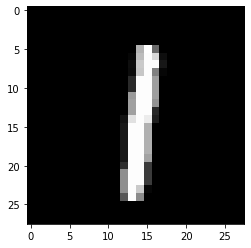

In [34]:
# normalized and flattened data can still be visualized as original data
plt.imshow(X_normalized_train[40].reshape(28,28), cmap='gray')
plt.show()

So, we can see that normalizing does not effect the nature of data. So, we will use this normalized and flattened layer as the input to our neural network.

# **Creating datasets for binary and multiclass classification-**

## **Binary Classification problem-**

MNIST dataset has 10 different target classes, each representing one of the digits from 0-9. Let's consider digits '**0**' and '**1**' for binary classification. We will take only these inputs drom the original dataset-

**Creating the dataset-**

In [35]:
train_idx = np.where((Y_train==0) | (Y_train==1))
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')

Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


We now have only 0's and 1's in the newly created subset of the dataset. As we can see that count of 0's and 1's is quite even. So, the dataset is quite evenly balanced.

**Splitting the training dataset-**

Often it is observed that training a model for a large number of epochs leads to the model overfitting very much to the training data set. To tackle this issue, we need a validation dataset to keep track of the 'validation performance'. So, we will now split the current training dataset (of 11344 instances) into a training set and validation set.

In [36]:
from sklearn.model_selection import train_test_split

We can use this library to split our data. 

In general, a split of 90-10, 80-20, 67-33 etc. is used. You can choose your own value as it is always a tradeoff. 

We will go with 80-20 split.

In [37]:
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 1)

In [38]:
print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

Instances in new train-set: 10132
Instances in val-set: 2533

Count of 0s and 1s in train-set: 4743 5389
Count of 0s and 1s in val-set: 1180 1353


In [39]:
# Traspose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

Shapes - ((784, 10132), (784, 2533), (784, 2115))


# **Building the Neural Net class:** 

# **Forward Pass-**

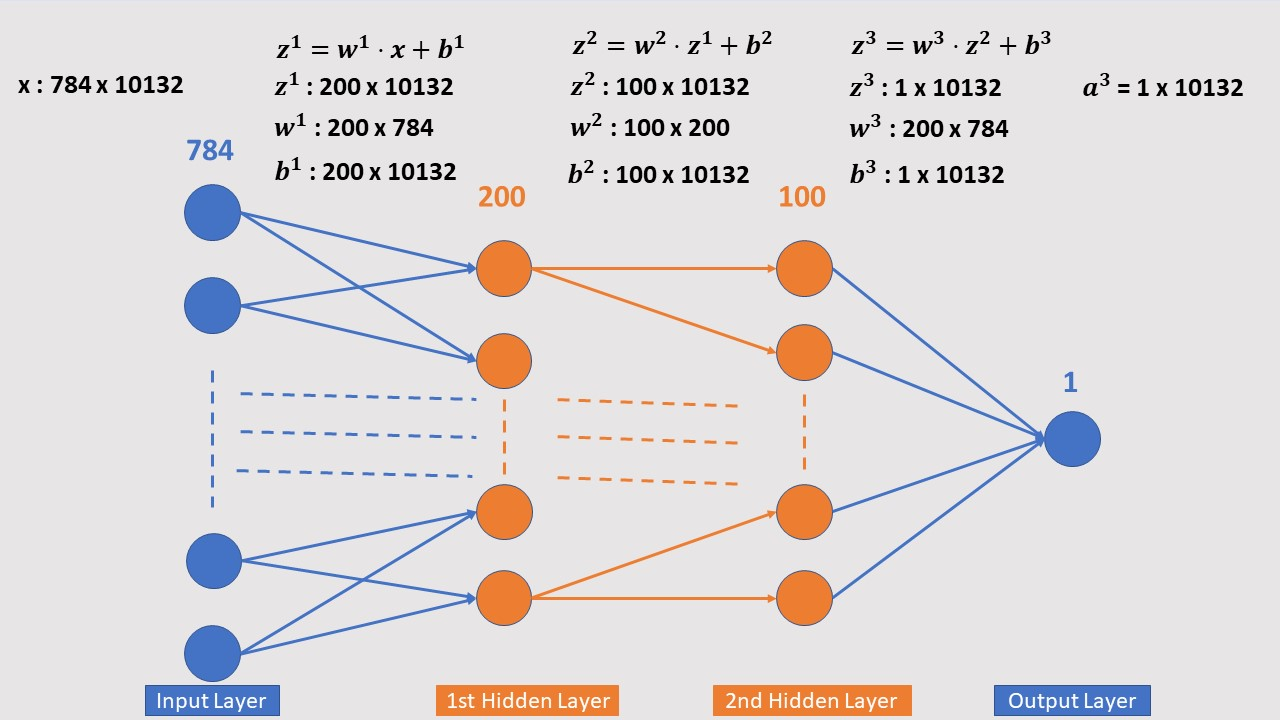

# **Equations of Backpropagation-**

**Recall:** $W^\ell$ represents the matrix of weights connecting layer $\ell − 1$ to
layer $\ell$.

**Recall:** $δ^\ell$ represents the error gradients with respect to the activations at the layer $\ell$.



# Gradients at the output layer:  

Now, the gradient with respect to weights for output layer would be- 

$\frac{\partial e}{\partial w_{i j}^{L}}=\frac{\partial e}{\partial z_i^{L}} a_j^{L-1}=\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right) a_j^{L-1}$

Collecting these partial derivatives into a matrix we get: 

$\nabla_{W^L} e= \operatorname{Diag}\left({\phi^L}'\right) \delta^L (a^{L-1})^\top$ 

where 

$\delta^L = \begin{bmatrix} \frac{\partial e}{\partial a_1^{L}} \ldots \frac{\partial e}{\partial a_{N_L}^{L}} \end{bmatrix}^\top$. 

#Exercise: Implement the computation of error gradient with respect to $W^L$ in code. 

Similarly, the gradient with respect to bias at output layer would be- 

$\frac{\partial e}{\partial b_{i}^{L}}=\frac{\partial e}{\partial z_i^{L}}\cdot 1 =\frac{\partial e}{\partial a_i^{L}} \phi^{\prime}\left(z_i^{L}\right)$

Now, these gradients can be collected into a vector:

$\nabla_{b^L} e= \operatorname{Diag}\left( \phi^{L'} \right) \delta^L$.

#Exercise: Implement the computation of error gradient  with respect to $b^L$ in code. 


# Gradient in the hidden layer: 

The gradient with respect to weights for hidden layers would be-

$\nabla_{W^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}\left(a^{\ell-1}\right)^{\top}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L\left(a^{\ell-1}\right)^{\top}$ 

$\text { where } V^{\ell+1}=\left(W^{\ell+1}\right)^{\top} \operatorname{Diag}\left(\phi^{\ell+1^{\prime}}\right) \text {. }$

And the gradient with respect to bias at hidden layers would be- 

$\nabla_{b^{\ell}} e=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) \delta^{\ell}=\operatorname{Diag}\left(\phi^{\ell^{\prime}}\right) V^{\ell+1} \ldots V^L \delta^L$.

#Exercise: Implement the recursive relations to compute error gradients with respect to weights and bias in hidden layers. (Hint: Use an iteration.)

In [46]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of numbers listing neurons for each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """
        
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer 
        self.layer_activations = [] # activations in each layer
        
        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
            raise ValueError("initialization must be 'rand' or 'randn'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer
        
            
    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""                 
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        return self.sigmoid(z)*(1-self.sigmoid(z))

    def tanh(self, z):
        """returns result of the tan hyperbolic activation function on input z."""                 
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z):
        """returns derivative of tan hyperbolic activation function applied on input z."""
        return 1 - self.tanh(z)**2

    def stanh(self,z):
        """returns result of the stanh activation function on input z."""
        return z*self.tanh(z)  

    def sech(self,z):
        """returns the."""
        return 2/(np.exp(z)+np.exp(-z))

    def stanhPrime(self,z):
        """returns derivative of stanh activation function applied on input z."""
        return self.tanh(z) * z*self.sech(z)*self.sech(z)

    def linear(self, z):
        """returns result of the linear activation function on input z."""                                    
        return z
    
    def linearPrime(self,z):
        """returns derivative of linear activation function applied on input z."""                                                      
        return 1

    def ReLU(self,z):
        """returns result of the ReLU activation function on input z."""                  
        return np.maximum(0, z) #element-wise maximum of array elements
    
    def ReLUPrime(self,z):
        """returns derivative of ReLU activation function applied on input z."""
        return z >= 0

    def a_ReLU(self,z,a=0.1):
        """returns result of the a-ReLU activation function on input z."""
        return a*np.maximum(0, z)

    def a_ReLUPrime(self,z,a=0.1):
        """returns derivative of a_ReLU activation function applied on input z."""
        return a*(z >= 0)
    
    def EXU(self,z,mu=1.67,beta=1.05):
        """returns result EXU activation function applied on input z."""
        return beta*z*(z >= 0) + beta*mu*(np.exp(z)-1)*(z < 0)

    def EXUPrime(self,z,mu=1.67,beta=1.05):
        """returns derivative of EXU activation function applied on input z."""
        return beta*(z >= 0) + beta*mu*np.exp(z)*(z < 0)
    
    def softmax(self, z):
        """returns result of the softmax activation function on input z."""
        return np.exp(z)/np.sum(np.exp(z)) #not sure about the axis
    
    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        diff = predicted - actual
        diff_squared = diff**2
        return np.sum(diff_squared)
    
    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        return (-1) * np.sum(actual*np.log(predicted))
    
    def forward(self, a):
        """Defines forward pass of the NN

        Args:
            a (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_z (list): layerwise immediate output 
            layer_a (list): layerwise activations 
        """
        #Implement forward pass         
        layer_a = []
        layer_a.append(a) 
        layer_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
          b, w = param[0], param[1]
          z = np.dot(w, a) + b
          if self.layer_activations[i].lower()=='sigmoid':
            a = self.sigmoid(z)
          elif self.layer_activations[i].lower()=='tanh':
            a = self.tanh(z)
          elif self.layer_activations[i].lower()=='linear':
            a = self.linear(z)
          elif self.layer_activations[i].lower()=='relu':
            a = self.ReLU(z)
          elif self.layer_activations[i].lower()=='softmax':
            a = self.softmax(z)
          elif self.layer_activations[i].lower()=='stanh':
            a = self.stanh(z)
          elif self.layer_activations[i].lower()=='arelu':
            a = self.a_ReLU(z)
          elif self.layer_activations[i].lower()=='exu':
            a = self.EXU(z)
          else:
            raise ValueError("Kindly choose an activation function from the following list = [sigmoid, tanh, linear, relu, softmax]")
          layer_z.append(z)
          layer_a.append(a)
        return a, layer_z, layer_a
          
    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """
        
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        #Implement backpropagation
        n = zs[-1].shape[1]
        
        for t in range(1, len(activations)):
            if t == 1:
                delta = (activations[-1] - y)
            else:
                delta = np.dot(self.weights[-t+1].transpose(), delta)

            if self.layer_activations[-t].lower()=='sigmoid':
                delta *= self.sigmoidPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='relu':
                delta *= self.ReLUPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='tanh':   
                delta *= self.tanhPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='linear':
                delta *= self.linearPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='stanh':
                delta *= self.stanhPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='arelu':
                delta *= self.a_ReLUPrime(zs[-t])
            elif self.layer_activations[-t].lower()=='exu':
                delta *= self.EXUPrime(zs[-t])
            else:
                raise ValueError("Activation function not supported")

            grad_b[-t] = np.sum(delta, axis=1, keepdims=True) / n
            grad_w[-t] = np.dot(delta, activations[-t-1].transpose()) / n

        return (grad_b, grad_w)                         

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """
        
        grad_b, grad_w = grads[0], grads[1]

        for i in range(len(self.weights)):
            self.weights[i] -= lr * grad_w[i] 
            self.biases[i] -= lr* grad_b[i]


    def error(self, X, Y, errors):  
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)
                    
    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """
        
        if onehotencoded:
            # a method for creating one hot encoded labels 
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity 
                # matrix of size n where n is the total number of classes. so below 
                # code uses Y (a 1d array) for indexing into the identity matrix.
                return np.eye(n)[Y].T 

            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.  
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval
        
        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE
            
        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf
        best_params = self.copy_params()
        
        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')

        while j < patience:

            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X,idx,axis=-1) 
            Y1 = np.take(Y,idx,axis=-1)

            for q in range(0,len(X1[0]),batch_size):
                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end] 
                train_y = Y1[:,start:end]
                out, dot_prod_z, activations_a = self.forward(train_x)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                self.update_parameters(grads, get_lr(i))
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)
            if Xval is not None:
                self.error(Xval, Yval, val_errors)

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)
                
            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params
                    
        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:           
            return (train_errors, val_errors)
        return train_errors
        
    def predict(self, x):
      #Implement the code for prediction
      out, dot_prod_z, activations_a = self.forward(x)
      pass

**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

Let's now create a simple feed-forward neural network. 

* Number of input neurons = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer can be decided by the user.

In [48]:
#D_in is input dimension
#H1 is dimension of first hidden layer 
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish. 

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.

activation_functions_d = ['stanh','stanh','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin_d = Neural_Network(neurons, activation_functions_d) 

activation_functions_e = ['arelu','arelu','sigmoid'] # activations in each layer 
nn_bin_e = Neural_Network(neurons, activation_functions_e)

activation_functions_f = ['exu','exu','sigmoid'] # activations in each layer 
nn_bin_f = Neural_Network(neurons, activation_functions_f)

## Training the model:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 5202.910633721434, Loss on val = 1312.991876486909
Epoch 10..............Loss on train = 5199.233429616785, Loss on val = 1313.5470612079125
Early Stopping .............. Returning best weights


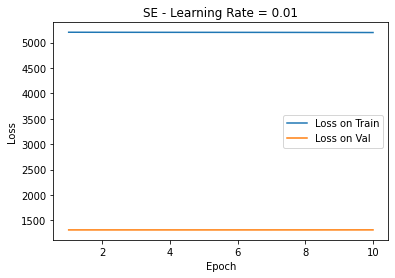

In [42]:
losses = nn_bin_d.train(X_train_bin, Y_train_bin, batch_size=None, lr=1e-2, max_epochs=2000, Xval = X_val_bin, Yval = Y_val_bin)

Epoch 5..............Loss on train = 4878.043745412297, Loss on val = 1211.030228917888
Epoch 10..............Loss on train = 4875.294732514953, Loss on val = 1210.3694125583079
Epoch 15..............Loss on train = 4872.585171533716, Loss on val = 1209.7178116848336
Epoch 20..............Loss on train = 4869.914021664297, Loss on val = 1209.0751539516916
Epoch 25..............Loss on train = 4867.280015552129, Loss on val = 1208.4411959607266
Epoch 30..............Loss on train = 4864.681893876897, Loss on val = 1207.8156361197575
Epoch 35..............Loss on train = 4862.118544821556, Loss on val = 1207.1981944531872
Epoch 40..............Loss on train = 4859.5890806180605, Loss on val = 1206.5886400812917
Epoch 45..............Loss on train = 4857.092251549538, Loss on val = 1205.9867583265996
Epoch 50..............Loss on train = 4854.627186400736, Loss on val = 1205.3922630848656
Epoch 55..............Loss on train = 4852.19271019555, Loss on val = 1204.804911256824
Epoch 60.....

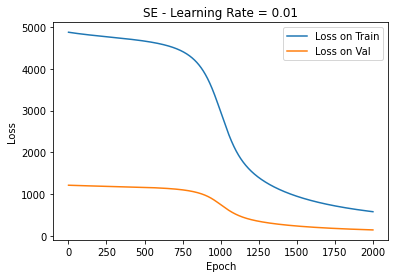

In [43]:
losses = nn_bin_e.train(X_train_bin, Y_train_bin, batch_size=None, lr=1e-2, max_epochs=2000, Xval = X_val_bin, Yval = Y_val_bin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


Epoch 5..............Loss on train = 6094.941871993743, Loss on val = 1511.34067042154
Epoch 10..............Loss on train = 6087.564271188696, Loss on val = 1508.639097669426
Epoch 15..............Loss on train = 6069.155994961055, Loss on val = 1504.199838786064
Epoch 20..............Loss on train = 6048.661966054975, Loss on val = 1500.9412631390678
Epoch 25..............Loss on train = 6027.742324382906, Loss on val = 1495.3753531484858
Epoch 30..............Loss on train = 5993.9139659537295, Loss on val = 1489.2569772640543
Epoch 35..............Loss on train = 5971.915149958277, Loss on val = 1483.2425727095638
Epoch 40..............Loss on train = 5944.360970148976, Loss on val = 1477.0302652641244
Epoch 45..............Loss on train = 5920.4854511110625, Loss on val = 1475.5968778034674
Epoch 50..............Loss on train = 5892.762582672723, Loss on val = 1468.826781646531
Epoch 55..............Loss on train = 5868.69013475791, Loss on val = 1461.724753785365
Epoch 60........

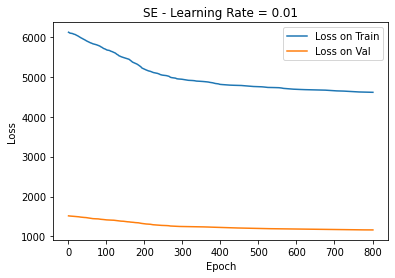

In [49]:
losses = nn_bin_f.train(X_train_bin, Y_train_bin, batch_size=None, lr=1e-2, max_epochs=2000, Xval = X_val_bin, Yval = Y_val_bin)

# Question 2

In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/RestaurantReviews.csv")

In [7]:
df.shape

(10806, 677)

In [8]:
from sklearn.utils import shuffle
data = shuffle(df)
train_fraction=0.65
test_fraction = 0.2
train_set = data[:int((len(data)+1)*train_fraction)]
test_set = data[int((len(data)+1)*train_fraction):int((len(data)+1)*(train_fraction+test_fraction))]
val_set = data[int((len(data)+1)*(train_fraction+test_fraction)):]

In [9]:
train_set.columns

Index(['id', 'back_try', 'not_good', 'i_have_to', 'about_place', 'portions',
       'come_back', 'the_food', 'that_it_was', 'really_like',
       ...
       'to_choose_from', 'will_definitely', 'IsRatingBad', 'IsRatingModerate',
       'IsRatingGood', 'IsFoodGood', 'IsServiceGood', 'IsAmbianceGood',
       'IsDealsGood', 'IsPriceGood'],
      dtype='object', length=677)

In [10]:
x, y = train_set.iloc[:, :-5], train_set.iloc[:,-5:]

In [11]:
x.shape

(7024, 672)

In [12]:
y.shape

(7024, 5)